In [31]:
import pandas as pd
import seaborn as sns
import scipy as sp
import math
import matplotlib.pyplot as plt
from plotly.offline import iplot
from scipy.spatial.distance import cosine
from plotly.offline import iplot
import plotly as py
import missingno as mno
import cufflinks as cf
import math 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#py.offline.init_notebook_mode(connected=True) 
#cf.go_offline() 

In [32]:
df=pd.read_csv('train.csv', skipinitialspace=True)
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.2810,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.3600,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.2620,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.1170,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.2990,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.1320,0.0335,117.319,432027,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.1230,0.0016,92.323,182747,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.0713,0.0708,126.000,400091,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.4020,0.2700,160.044,197250,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [33]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats',
       'n_bars', 'popularity_confidence', 'processing', 'genre'],
      dtype='object')

## coseno ed eliminazione feature_duration_ms

In [34]:
print(1 - cosine(df["duration_ms"], df["features_duration_ms"])) ## contengono gli stessi dati

0.9999826934770785


In [35]:
df=df.drop(['features_duration_ms'], axis=1)

In [36]:
df

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.536000,0.2810,0.6350,142.221,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.934000,0.3600,0.0336,75.596,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.800000,0.2620,0.4890,116.628,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,...,0.001270,0.1170,0.3850,140.880,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,...,0.096900,0.2990,0.6370,143.956,4.0,733.0,183.0,NaN,4.067086,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432026,False,0,Autechre,EP7,0.554,0.657,1,-14.232,...,0.615000,0.1320,0.0335,117.319,NaN,837.0,212.0,NaN,2.367412,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182746,False,44,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.103,0.860,1,-19.627,...,0.940000,0.1230,0.0016,92.323,3.0,277.0,92.0,NaN,2.367412,sleep
14997,Psychological Attack,400091,False,43,Droplex,Psychological Attack,0.799,0.535,1,-9.103,...,0.857000,0.0713,0.0708,126.000,4.0,837.0,209.0,NaN,2.367412,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197250,False,37,Bassnectar;Lafa Taylor,Noise vs Beauty,0.511,0.970,5,-2.299,...,0.000014,0.4020,0.2700,160.044,4.0,513.0,130.0,NaN,1.279305,breakbeat


In [37]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'n_beats', 'n_bars',
       'popularity_confidence', 'processing', 'genre'],
      dtype='object')

## Rimozione degli attributi della popolarità

In [38]:
df=df.drop(['popularity', 'popularity_confidence'], axis=1)

In [39]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'artists', 'album_name',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'n_beats', 'n_bars', 'processing', 'genre'],
      dtype='object')

In [40]:
df.dtypes

name                 object
duration_ms           int64
explicit               bool
artists              object
album_name           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
n_beats             float64
n_bars              float64
processing          float64
genre                object
dtype: object

## Standardizzazione da secondi a millisecondi

In [41]:
df['duration_ms'] = df['duration_ms'].apply(lambda x: x/1000)

## Standardizzazione float

In [42]:
df=df.round(2)

## Regressione per predire i valori

In [43]:
df.isnull().sum()

name                   0
duration_ms            0
explicit               0
artists                0
album_name             0
danceability           0
energy                 0
key                    0
loudness               0
mode                4450
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature      2062
n_beats                0
n_bars                 0
processing             0
genre                  0
dtype: int64

<Axes: >

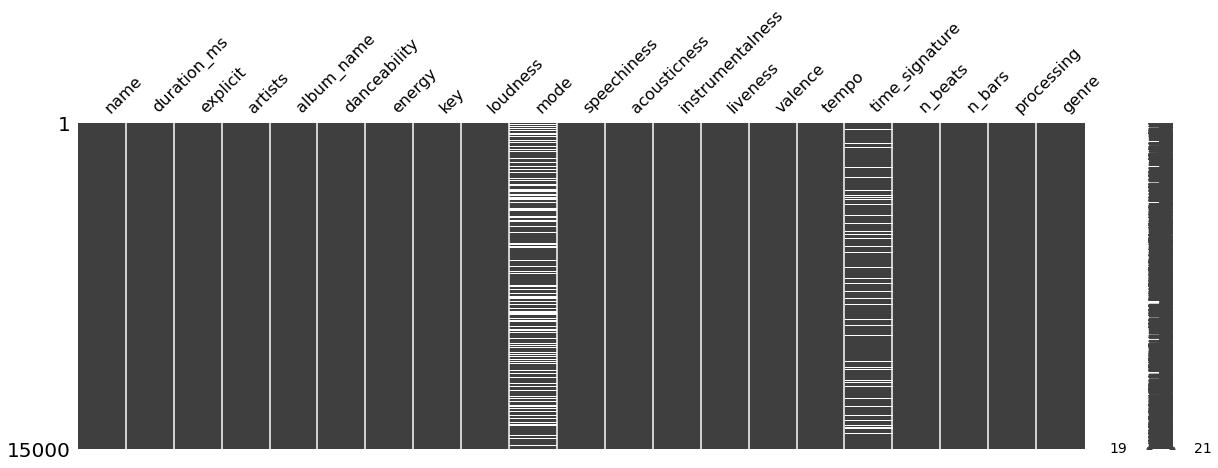

In [44]:
mno.matrix(df, figsize = (20, 6))

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Split the data into two subsets: one with non-null values and one with null values
train_data = df[~df['mode'].isnull()]  # Rows with non-null values
test_data = df[df['mode'].isnull()]  # Rows with null values

# Feature selection and engineering (select relevant features)
X_train = train_data[['duration_ms', 'loudness', 'tempo', 'n_beats', 'n_bars', 'processing']]  # Choose relevant features
y_train = train_data['mode']  # Target variable with non-null values

X_test = test_data[['duration_ms', 'loudness', 'tempo', 'n_beats', 'n_bars', 'processing']]  # Choose the same features for prediction

# Initialize and train a logistic regression model
logistic_model = LogisticRegression(C=0.000005, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0000001, verbose=0,
                   warm_start=False)
logistic_model.fit(X_train, y_train)

# Predict null values
predicted_values = logistic_model.predict(X_test)

# Replace null values in the original DataFrame with the predicted values
df.loc[df['mode'].isnull(), 'mode'] = predicted_values

# Evaluate the model using the non-null values in the training data
y_true = y_train
y_pred = logistic_model.predict(X_train)

# Calculate and print accuracy and F1-score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.63
Precision: 0.63
Recall: 1.00
F1-Score: 0.77
Confusion Matrix:
 [[   1 3888]
 [   4 6657]]


<Axes: >

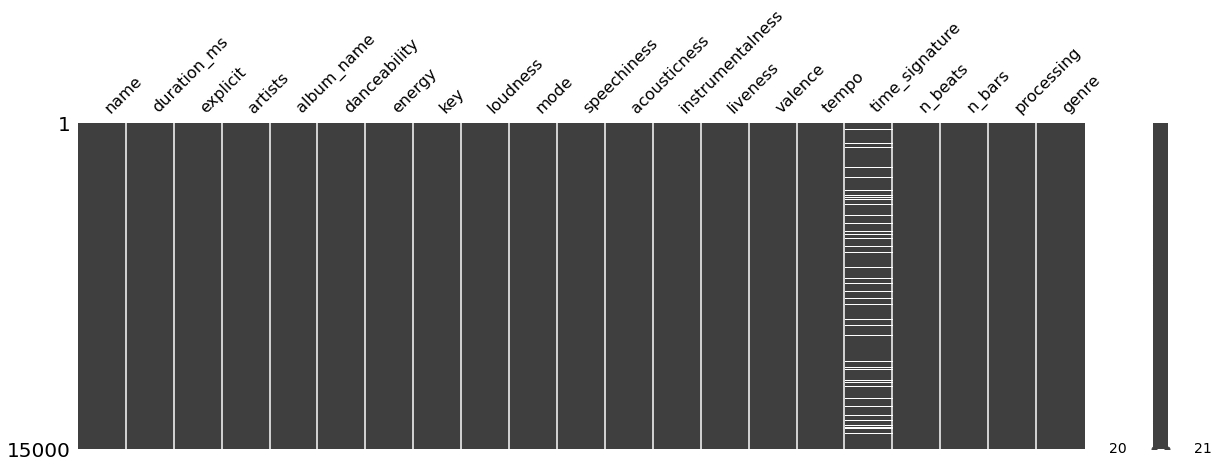

In [46]:
mno.matrix(df, figsize = (20, 6))

In [47]:
df.isnull().sum()

name                   0
duration_ms            0
explicit               0
artists                0
album_name             0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature      2062
n_beats                0
n_bars                 0
processing             0
genre                  0
dtype: int64

## TIME SIGNATURE

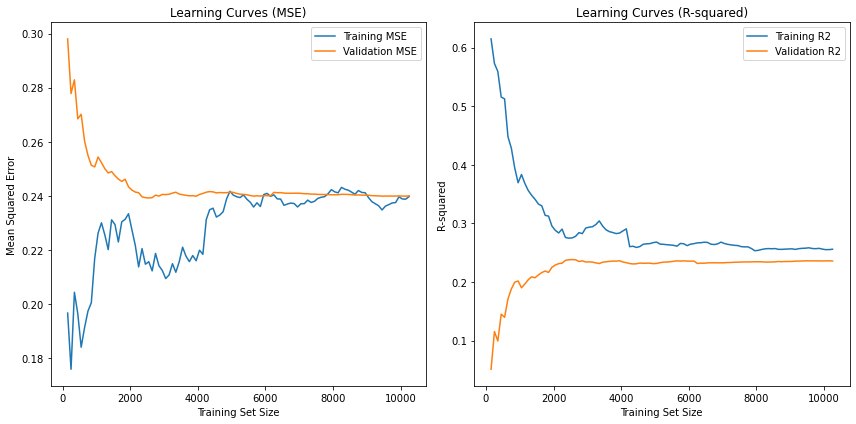

0.2359439394420043
0.23998300541135273


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score





# Split data into training and test sets
train_data = df[~df['time_signature'].isnull()]
test_data = df[df['time_signature'].isnull()]

# Feature selection and engineering
X = train_data[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing']]  # Choose relevant features
y = train_data['time_signature']

X_test = test_data[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing']]  # Choose the same features for prediction

# Initialize Ridge regression model with a default alpha
regression_model = Ridge(alpha=0.5)  # Initial alpha value (like a learning rate)

train_sizes, train_mse, val_mse, train_r2, val_r2 = [], [], [], [], []

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create subsets of your data with increasing sizes
for train_size in range(150, len(X_train), 100):  # You can adjust the step size
    X_subset, y_subset = X_train[:train_size], y_train[:train_size]
    
    regression_model.fit(X_subset, y_subset)
    
    # Make predictions on the validation set
    y_val_pred = regression_model.predict(X_val)
    
    # Calculate validation MSE and R-squared
    val_mse_value = mean_squared_error(y_val, y_val_pred)
    val_r2_value = r2_score(y_val, y_val_pred)
    
    train_sizes.append(train_size)
    train_mse.append(mean_squared_error(y_subset, regression_model.predict(X_subset)))
    val_mse.append(val_mse_value)
    train_r2.append(r2_score(y_subset, regression_model.predict(X_subset)))
    val_r2.append(val_r2_value)

# Plot learning curves for MSE and R-squared
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mse, label='Training MSE')
plt.plot(train_sizes, val_mse, label='Validation MSE')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Learning Curves (MSE)')

# Plot R-squared
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_r2, label='Training R2')
plt.plot(train_sizes, val_r2, label='Validation R2')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared')
plt.legend()
plt.title('Learning Curves (R-squared)')

plt.tight_layout()
plt.show()

print(val_r2_value)
print(val_mse_value)


In [49]:


# Split data into training and test sets
train_data = df[~df['time_signature'].isnull()]
test_data = df[df['time_signature'].isnull()]

# Feature selection and engineering
X_train = train_data[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing', 'mode']]  # Choose relevant features
y_train = train_data['time_signature']

X_test = test_data[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing', 'mode']]  # Choose the same features for prediction

# Model selection and training
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict null values
predicted_values = regression_model.predict(X_test)

# Replace null values with predicted values
df.loc[df['time_signature'].isnull(), 'time_signature'] = predicted_values

# Model evaluation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

regression_model.fit(X_train, y_train)
y_val_pred = regression_model.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_val_pred)

print(f"Mean Squared Error on Validation Data: {mse}")
print(f"Root Mean Squared Error on Validation Data: {rmse}")
print(f"R-squared on Validation Data: {r2}")


Mean Squared Error on Validation Data: 0.2400068375012107
Root Mean Squared Error on Validation Data: 0.48990492700238353
R-squared on Validation Data: 0.23586806301625263


<Axes: >

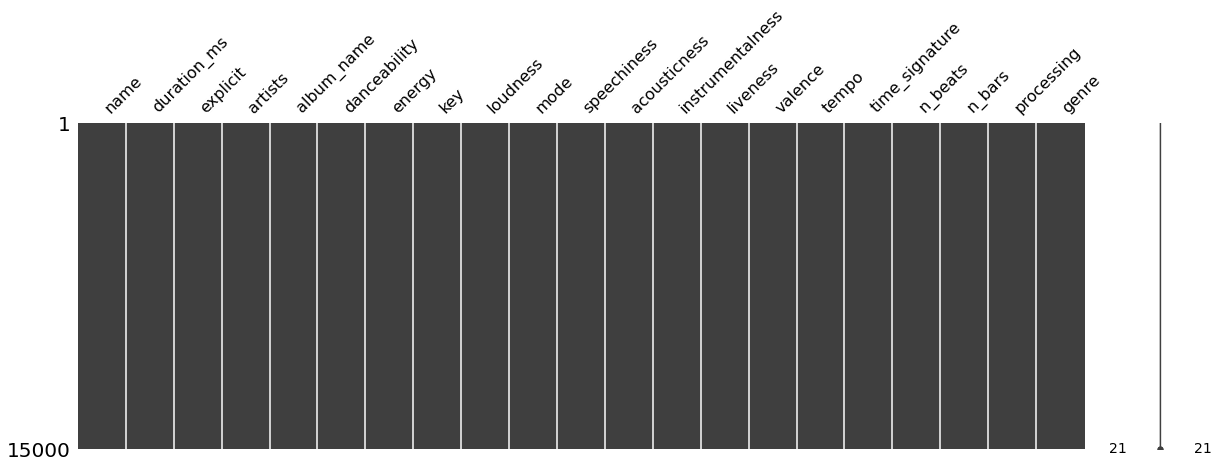

In [50]:
mno.matrix(df, figsize = (20, 6))

In [51]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'artists', 'album_name',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'n_beats', 'n_bars', 'processing', 'genre'],
      dtype='object')

## file cvs con outliers 

In [52]:
df

,name,duration_ms,explicit,artists,album_name,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
0,Long Road,241.76,False,Funki Porcini,Hed Phone Sex,0.69,0.51,5,-12.53,1.0,...,0.30,0.54,0.28,0.64,142.22,4.0000,567.0,141.0,1.28,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444.00,False,Siavash Amini,A Trail of Laughters,0.07,0.20,1,-24.80,0.0,...,0.28,0.93,0.36,0.03,75.60,4.0000,617.0,155.0,2.37,iranian
2,Ondskapens Galakse,333.51,False,Kvelertak,Nattesferd,0.36,0.85,2,-7.44,1.0,...,0.00,0.80,0.26,0.49,116.63,4.0000,652.0,162.0,3.70,black-metal
3,Can't Look Away,269.80,False,The Wood Brothers,One Drop of Truth,0.52,0.58,5,-5.61,1.0,...,0.07,0.00,0.12,0.38,140.88,4.0000,619.0,155.0,1.28,bluegrass
4,Thunderground,307.65,False,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.64,0.69,7,-11.34,1.0,...,0.00,0.10,0.30,0.64,143.96,4.0000,733.0,183.0,4.07,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,Outpt,432.03,False,Autechre,EP7,0.55,0.66,1,-14.23,1.0,...,0.02,0.62,0.13,0.03,117.32,3.9201,837.0,212.0,2.37,idm
14996,Natural Environment Sounds: To Improve Sleep a...,182.75,False,Natural White Noise Relaxation,Baby Sleep White Noise: Ultimate Album to Help...,0.10,0.86,1,-19.63,1.0,...,0.55,0.94,0.12,0.00,92.32,3.0000,277.0,92.0,2.37,sleep
14997,Psychological Attack,400.09,False,Droplex,Psychological Attack,0.80,0.54,1,-9.10,1.0,...,0.00,0.86,0.07,0.07,126.00,4.0000,837.0,209.0,2.37,techno
14998,Don't Hate The 808 (feat. Lafa Taylor),197.25,False,Bassnectar;Lafa Taylor,Noise vs Beauty,0.51,0.97,5,-2.30,1.0,...,0.00,0.00,0.40,0.27,160.04,4.0000,513.0,130.0,1.28,breakbeat


In [53]:
df.isnull().sum()

name                0
duration_ms         0
explicit            0
artists             0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
n_beats             0
n_bars              0
processing          0
genre               0
dtype: int64

In [54]:
df.to_csv("file_train_outliers.csv")

## Identifico gli outliers

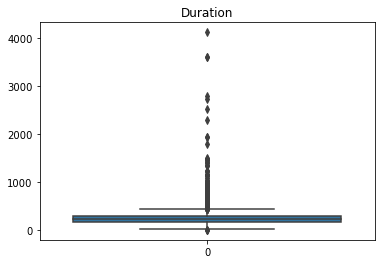

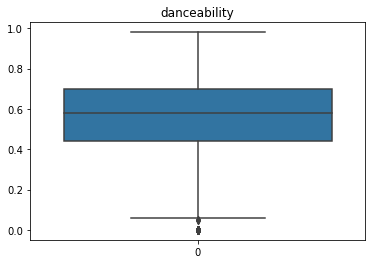

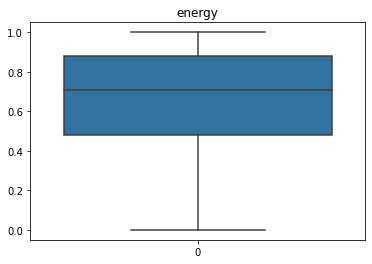

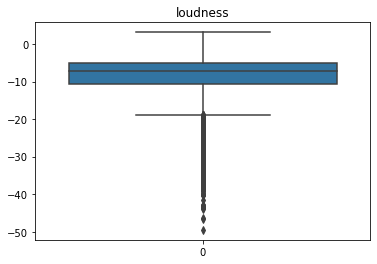

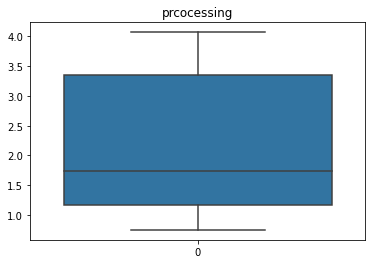

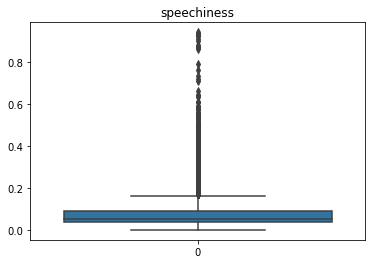

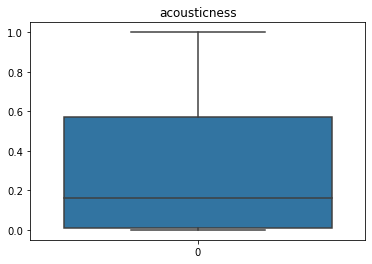

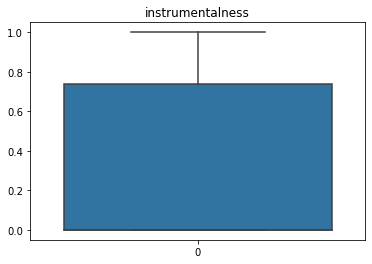

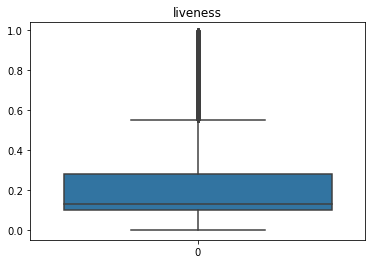

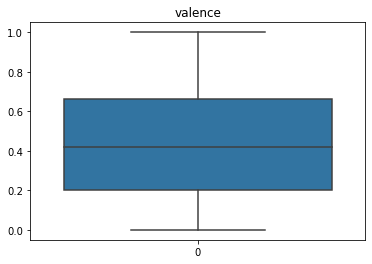

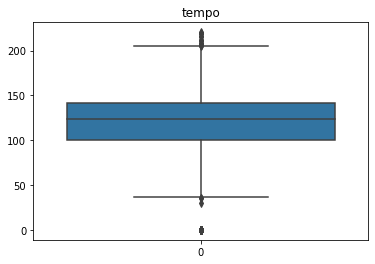

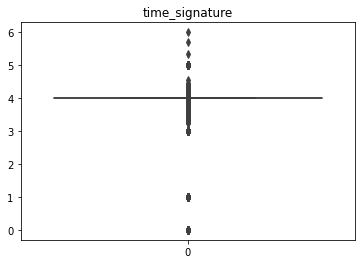

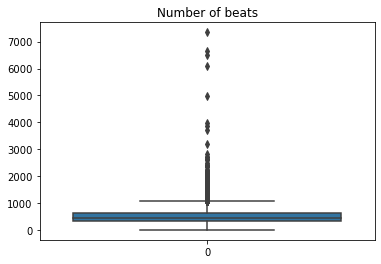

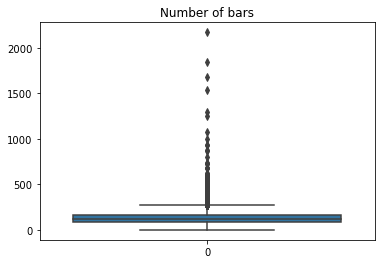

In [55]:
plt.title("Duration")
sns.boxplot(df["duration_ms"])
plt.savefig('duration_o.png', dpi=200) 
plt.show()


#plt.title("Popularity")
#sns.boxplot(df_prova["popularity"])
#plt.show()

plt.title("danceability")
sns.boxplot(df["danceability"])
plt.show()

plt.title("energy")
sns.boxplot(df["energy"])
plt.show()


plt.title("loudness")
sns.boxplot(df["loudness"])
plt.show()

plt.title("prcocessing")
sns.boxplot(df["processing"])
plt.show()

plt.title("speechiness")
sns.boxplot(df["speechiness"])
plt.show()

plt.title("acousticness")
sns.boxplot(df["acousticness"])
plt.show()

plt.title("instrumentalness")
sns.boxplot(df["instrumentalness"])
plt.show()


plt.title("liveness")
sns.boxplot(df["liveness"])
plt.show()


plt.title("valence")
sns.boxplot(df["valence"])
plt.show()

plt.title("tempo")
sns.boxplot(df["tempo"])
plt.show()


plt.title("time_signature")
sns.boxplot(df["time_signature"])
plt.show()

plt.title("Number of beats")
sns.boxplot(df["n_beats"])
plt.savefig('n_beats_o.png', dpi=200) 
plt.show()


plt.title("Number of bars")
sns.boxplot(df["n_bars"])
plt.savefig('n_bars_o.png', dpi=200) 
plt.show()


In [56]:
from scipy import stats

# Select only numeric columns for z-score calculation (excluding non-numeric or string columns)
numeric_columns = df[['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'n_beats', 'n_bars', 'processing']]

z_scores = np.abs(stats.zscore(numeric_columns))
threshold = 3  # Set a threshold for z-score (usually 2 to 3)

# Find outliers using z-score
outliers = (z_scores > threshold).any(axis=1)


df_no_outliers = df[~outliers]

In [57]:
df_no_outliers.to_csv("file_train_senza_outliers.csv")

## Dataframe senza outliers

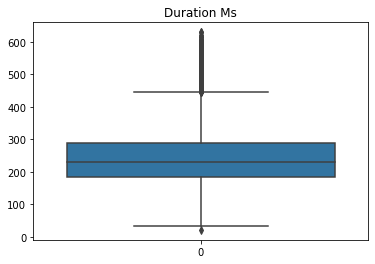

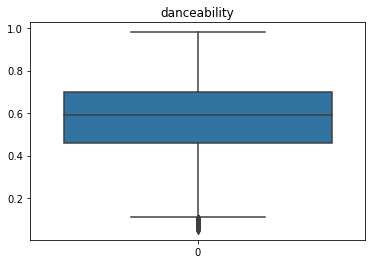

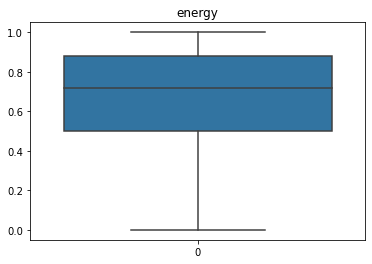

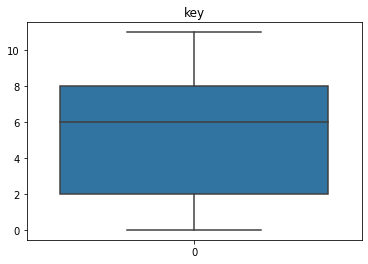

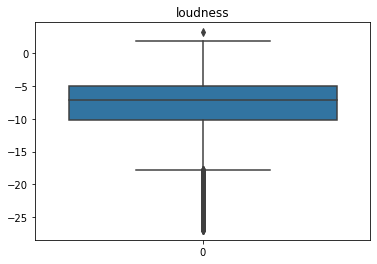

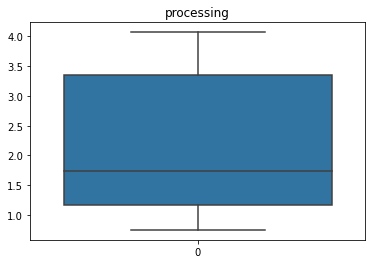

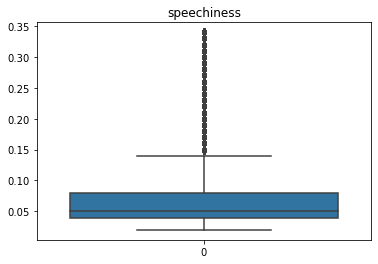

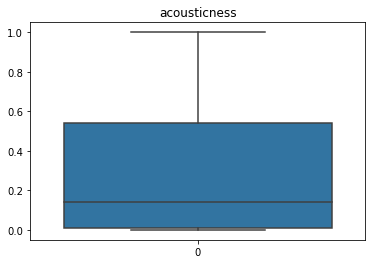

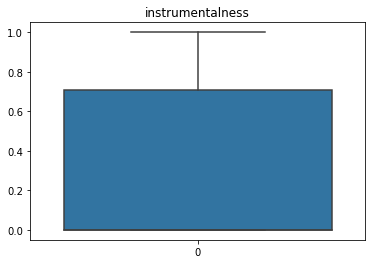

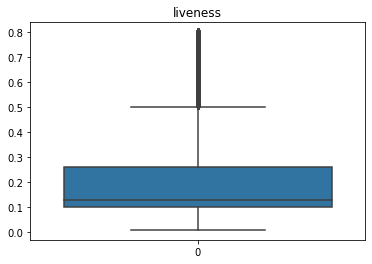

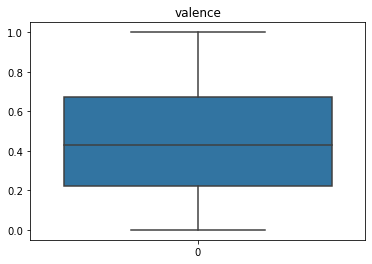

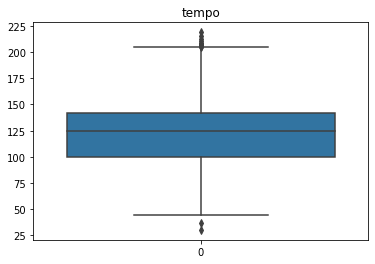

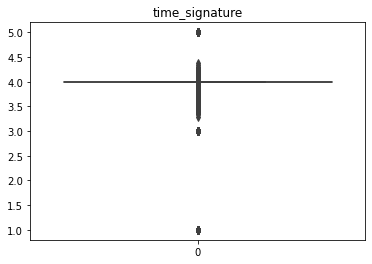

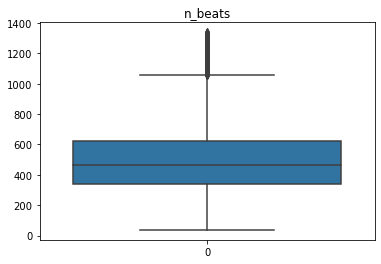

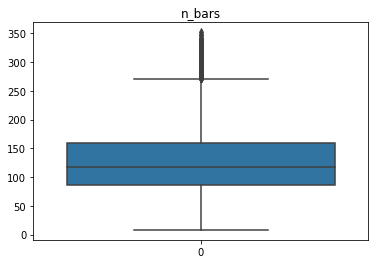

In [58]:
plt.title("Duration Ms")
sns.boxplot(df_no_outliers["duration_ms"])
plt.show()


plt.title("danceability")
sns.boxplot(df_no_outliers["danceability"])
plt.show()

plt.title("energy")
sns.boxplot(df_no_outliers["energy"])
plt.show()

plt.title("key")
sns.boxplot(df_no_outliers["key"])
plt.show()

plt.title("loudness")
sns.boxplot(df_no_outliers["loudness"])
plt.show()

plt.title("processing")
sns.boxplot(df_no_outliers["processing"])
plt.show()

plt.title("speechiness")
sns.boxplot(df_no_outliers["speechiness"])
plt.show()

plt.title("acousticness")
sns.boxplot(df_no_outliers["acousticness"])
plt.show()

plt.title("instrumentalness")
sns.boxplot(df_no_outliers["instrumentalness"])
plt.show()


plt.title("liveness")
sns.boxplot(df_no_outliers["liveness"])
plt.show()


plt.title("valence")
sns.boxplot(df_no_outliers["valence"])
plt.show()

plt.title("tempo")
sns.boxplot(df_no_outliers["tempo"])
plt.show()


plt.title("time_signature")
sns.boxplot(df_no_outliers["time_signature"])
plt.show()

plt.title("n_beats")
sns.boxplot(df_no_outliers["n_beats"])
plt.show()

plt.title("n_bars")
sns.boxplot(df_no_outliers["n_bars"])
plt.show()

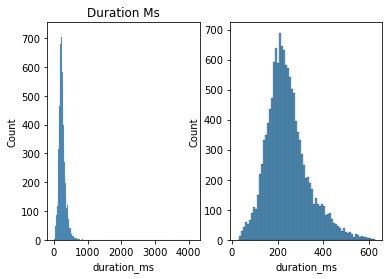

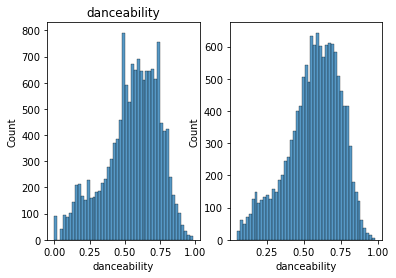

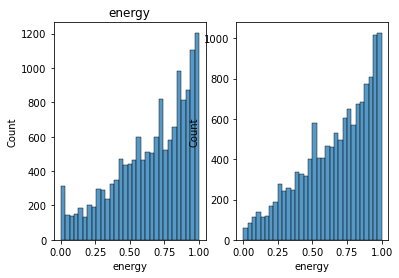

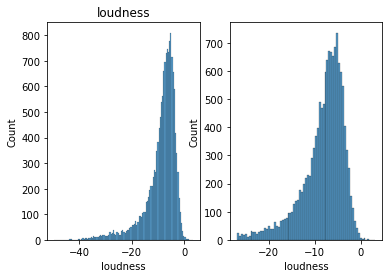

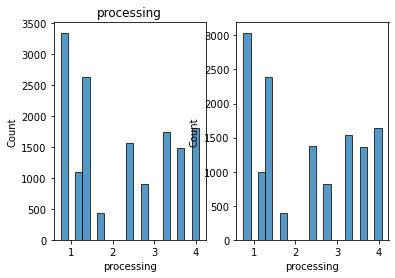

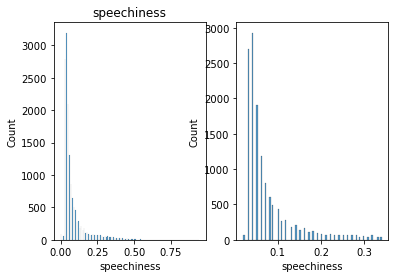

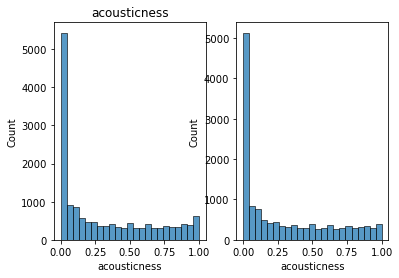

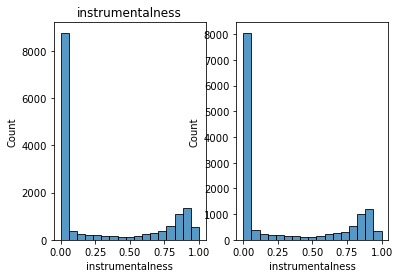

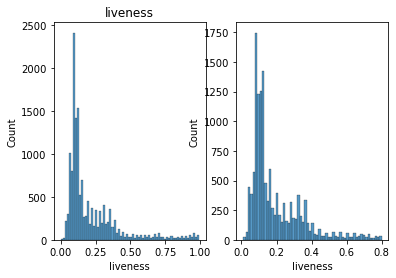

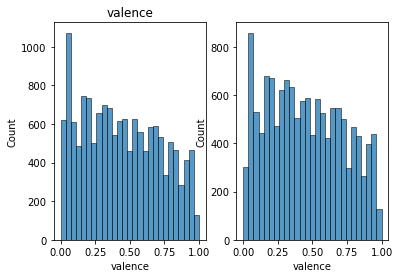

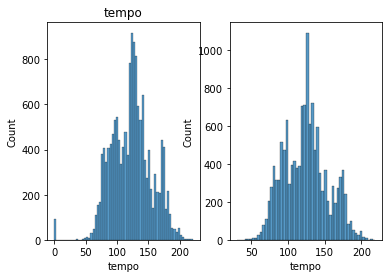

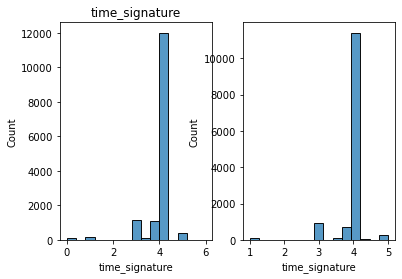

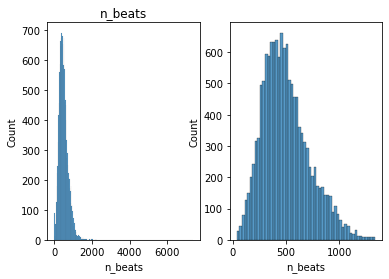

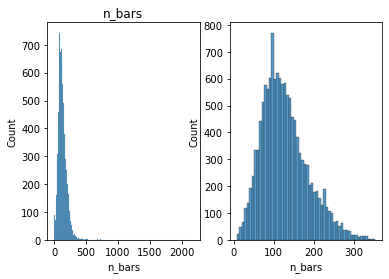

In [59]:
plt.subplot(1,2,1)
sns.histplot(df["duration_ms"])
plt.title("Duration Ms")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["duration_ms"])
plt.show()

#plt.subplot(1,2,1)
#sns.histplot(df["popularity"])
#plt.title("Popularity")
#plt.subplot(1,2,2)
#sns.histplot(df_no_outliers["popularity"])
#plt.show()


plt.subplot(1,2,1)
sns.histplot(df["danceability"])
plt.title("danceability")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["danceability"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["energy"])
plt.title("energy")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["energy"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["loudness"])
plt.title("loudness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["loudness"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["processing"])
plt.title("processing")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["processing"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["speechiness"])
plt.title("speechiness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["speechiness"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["acousticness"])
plt.title("acousticness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["acousticness"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["instrumentalness"])
plt.title("instrumentalness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["instrumentalness"])
plt.show()



plt.subplot(1,2,1)
sns.histplot(df["liveness"])
plt.title("liveness")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["liveness"])
plt.show()



plt.subplot(1,2,1)
sns.histplot(df["valence"])
plt.title("valence")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["valence"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["tempo"])
plt.title("tempo")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["tempo"])
plt.show()



plt.subplot(1,2,1)
sns.histplot(df["time_signature"])
plt.title("time_signature")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["time_signature"])
plt.show()


plt.subplot(1,2,1)
sns.histplot(df["n_beats"])
plt.title("n_beats")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["n_beats"])
plt.show()

plt.subplot(1,2,1)
sns.histplot(df["n_bars"])
plt.title("n_bars")
plt.subplot(1,2,2)
sns.histplot(df_no_outliers["n_bars"])
plt.show()

## Gestione valori nulli

In [60]:
df_no_outliers.isnull().sum()

name                0
duration_ms         0
explicit            0
artists             0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
n_beats             0
n_bars              0
processing          0
genre               0
dtype: int64